# Introduction to Scikit-Learn (sklearn)

0. End to end scikit-learn workflow
1. Getting data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algo and use it to make predictions on our data
4. Evaluating a model 
5. Improve a model
6. Save and load a trained model
7. Put it all together

## End to end scikit-learn workflow

In [1]:
#1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

#Create Y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3. Fit the model the the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train);

In [6]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [7]:
y_test

249    0
217    0
97     1
54     1
197    0
      ..
71     1
47     1
189    0
247    0
55     1
Name: target, Length: 61, dtype: int64

In [8]:
#4. Evaluate the model
clf.score(x_train, y_train)

1.0

In [9]:
clf.score(x_test, y_test)

0.8032786885245902

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 7, 27]])

In [12]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [13]:
#5. Improve the model
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test)* 100 : 2f}%")
    print("")

Trying model with 10 estimators.
Model accuracy on test set:  81.967213%

Trying model with 20 estimators.
Model accuracy on test set:  83.606557%

Trying model with 30 estimators.
Model accuracy on test set:  77.049180%

Trying model with 40 estimators.
Model accuracy on test set:  81.967213%

Trying model with 50 estimators.
Model accuracy on test set:  83.606557%

Trying model with 60 estimators.
Model accuracy on test set:  75.409836%

Trying model with 70 estimators.
Model accuracy on test set:  81.967213%

Trying model with 80 estimators.
Model accuracy on test set:  78.688525%

Trying model with 90 estimators.
Model accuracy on test set:  81.967213%



In [14]:
#6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    
    1. Split the data into features and labels (ususally 'x' and 'y')
    
    2. Filling (also called imputing) or disregarding missing values
    
    3. Converting non-numberical values to numerical values (also called feature encoding)

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [20]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
len(car_sales)

1000

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [23]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [27]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [28]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [30]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
model.score(x_test, y_test)

0.3235867221569877

## 1.2 What is there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [33]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
# Create x and y 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [36]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [37]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

### But we shouldnt use the above as it is calculated with nan

## Option 1: Fill missing data with Pandas

In [38]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [39]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

In [44]:
# Create x and y 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Let's try and convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Feature Scaling

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

    Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

    Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

A couple of things to note.

    Feature scaling usually isn't required for your target variable.

    Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

## Option 2: Fill missing data with Scikit Learn

In [45]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [49]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [50]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [51]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [54]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

# 2. Chosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algoorithms as estimators
* Classification problem - predicting a category (heart_disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as classification estimator
* Regression problem - predicting a number (selling price of a car)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking machine learning model for a regression model

In [55]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [56]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [57]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [58]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
housing_df = housing_df.drop("MedHouseVal", axis=1)

In [61]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

#Create data
housing_df["target"] = housing["target"]
x = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price


# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
model = Ridge()
model.fit(x_train, y_train)

# Check the score
model.score(x_test, y_test)

0.5758549611440131

What if `Ridge` didn't work or the score didn't fit our needs?

We can try diff models, but as in the diagram let's go for ensemble model. (an ensemble is a combination of smaller models rather than just a single model. 

https://scikit-learn.org/stable/modules/ensemble.html

In [63]:
# Import the randomForestRegressor model from ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

# Create the data
housing_df["target"] = housing["target"]
x = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score
model.score(x_test, y_test)

0.8066196804802649

## 2.2 Picking a ml model for a classification problem

In [64]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# Import the  LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
model = LinearSVC()
model.fit(x_train, y_train)

# Check the score
model.score(x_test, y_test)

/home/souvik150/Souvik/Personal/ML/ML and DS Course/sample_project/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [66]:
# Import the  Random Forest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Check the score
model.score(x_test, y_test)

0.8524590163934426

#### Quick Tip:

    1. If you have structured data, use ensemle methods
    2. If you have unstructured data, use Deep Learning or Transfer Learning.

## 3. Fit the model/algo on our data and use it to make prediction

### 3.1 Fitting the model to the data


* x = features, feature variables, data
* y = labels, targets, target variables

In [67]:
# Import the  Random Forest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)

# fit the model to data
model.fit(x_train, y_train)

# Check the score
model.score(x_test, y_test)

0.8524590163934426

In [68]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Making prediction using ML Model

2 ways to make predictions:

* 1. `predict()`
* 2. `predict_proba()`

In [70]:
# use a trained model to make predictions
clf.predict(x_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [71]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [72]:
# Compare predictions to trutj labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.9836065573770492

In [73]:
clf.score(x_test, y_test)

0.9836065573770492

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9836065573770492

#### make predictions with `predict.proba()`

In [75]:
# predict_proba() returns probablities of a classification label
clf.predict_proba(x_test[:5])

array([[0.96666667, 0.03333333],
       [0.81111111, 0.18888889],
       [0.14444444, 0.85555556],
       [0.95555556, 0.04444444],
       [0.05555556, 0.94444444]])

In [76]:
# Let's predict on the same data...

clf.predict(x_test[:5])

array([0, 0, 1, 0, 1])

In [77]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [78]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [79]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Create model instance
model = RandomForestRegressor()

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [80]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [81]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [82]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [83]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

* 1. Estimator's built in `score()` method
* 2. The `scoring` parameter
* 3. Problem-specific metric functions

In [84]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

RandomForestClassifier()

In [85]:
clf.score(x_train, y_train)

1.0

In [86]:
clf.score(x_test, y_test)

0.8524590163934426

In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestRegressor(n_estimators=100)

clf.fit(x_train, y_train)

RandomForestRegressor()

In [88]:
clf.score(x_train, y_train)

0.924203269641995

In [89]:
clf.score(x_test, y_test)

0.5106393318965518

In [105]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

np.random.seed(80)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestRegressor(n_estimators=1000)

clf.fit(x_train, y_train);

In [106]:
clf.score(x_test, y_test)

0.48883528822055133

In [107]:
cross_val_score(clf, x, y, cv=5)

array([0.        , 0.        , 0.34935981, 0.        , 0.        ])

In [108]:
cross_val_score(clf, x, y, cv=10)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.37065236, 0.        , 0.        , 0.        , 0.        ])

In [109]:
np.random.seed(42)


clf_single_score = clf.score(x_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

clf_single_score, clf_cross_val_score

(0.48883528822055133, 0.06791572273901811)

In [110]:
# Scoring parameter set to none by default
cross_val_score(clf, x, y ,cv=5, scoring=None)

array([0.        , 0.        , 0.34413564, 0.        , 0.        ])

### Classification model evaluation metrics

* 1. Accuracy
* 2. Area unser ROC curve
* 3. Confusion matrix
* 4. Classification report

#### Accuracy

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score= cross_val_score(clf, x, y, cv=5)

In [119]:
np.mean(cross_val_score)

0.8248087431693989

In [121]:
print(f"Heart Disease classifier accuracy: {np.mean(cross_val_score)* 100:.2f}%")

Heart Disease classifier accuracy: 82.48%


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate vs false positive rate

* True positive = predict 1 truth 1
* False positive = predict 1 truth 0
* True negative = prediict 0 truth 0
* False negative = prediict 0 truth 1

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [125]:
from sklearn.metrics import roc_curve

clf.fit(x_train, y_train)

# Make predictions with probablities
y_probs = clf.predict_proba(x_test)
y_probs

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61],
       [0.16, 0.84],
       [0.23, 0.77],
       [0.03, 0.97],
       [0.5 , 0.5 ],
       [0.15, 0.85],
       [0.92, 0.08],
       [0.23, 0.77],
       [0.51, 0.49],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.06, 0.94],
       [0.15, 0.85],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.85, 0.15],
       [0.72, 0.28],
       [0.14, 0.86],
       [0.88, 0.12],
       [0.32, 0.68],
       [0.59, 0.41],
       [0.81, 0.19],
       [0.86, 0.14],
       [0.78, 0.22],
       [0.51, 0.49],
       [0.09, 0.91],
       [0.04, 0.96],
       [0.22, 0.78],
       [0.12, 0.88],
       [0.8 , 0.2 ],
       [0.03, 0.97],
       [0.65, 0.35],
       [0.22, 0.78],
       [0.12, 0.88],
       [0.76, 0.24],
       [0.98, 0.02],
       [0.57, 0.43],
       [0.97, 0.03],
       [0.1 ,

In [127]:
y_probs_positive = y_probs[:, 1]
y_probs_positive 

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61, 0.84,
       0.77, 0.97, 0.5 , 0.85, 0.08, 0.77, 0.49, 0.05, 0.05, 0.94, 0.85,
       1.  , 0.76, 0.15, 0.28, 0.86, 0.12, 0.68, 0.41, 0.19, 0.14, 0.22,
       0.49, 0.91, 0.96, 0.78, 0.88, 0.2 , 0.97, 0.35, 0.78, 0.88, 0.24,
       0.02, 0.43, 0.03, 0.9 , 0.75, 0.36, 0.42, 0.2 , 0.9 , 0.31, 0.47,
       0.97, 0.67, 0.06, 0.94, 0.06, 0.07])

In [129]:
#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

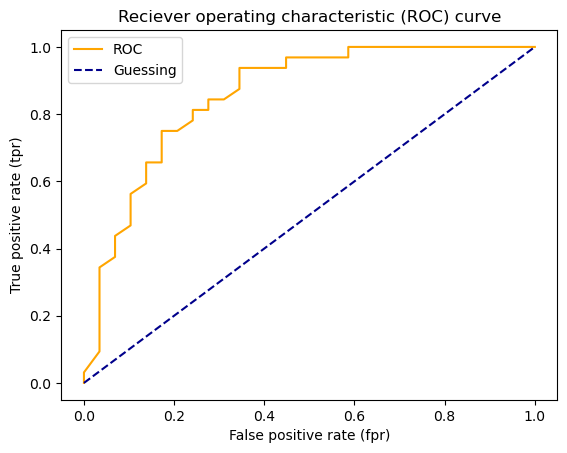

In [130]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [131]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

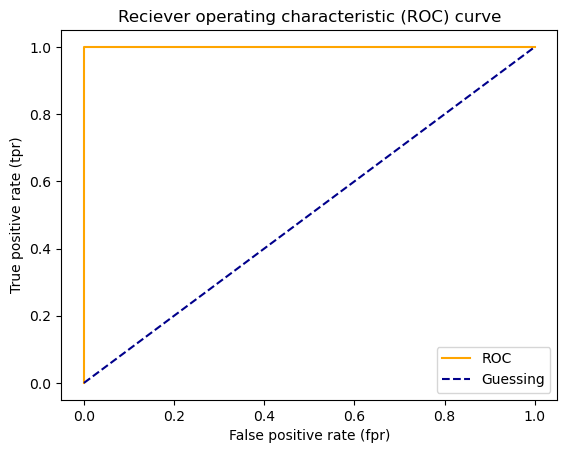

In [132]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [133]:
# Perfect AUC score

roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving an idea where the model is getting confused.

In [134]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [135]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual labels"],
            colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,8,24


1) 00, 11 = True
2) 01, 10 = False

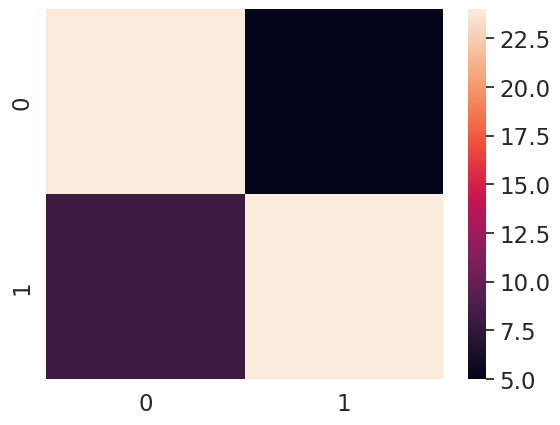

In [138]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

**Confusion matrix**

The next way to evaluate a classification model is by using a confusion matrix.
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, this gives you an idea of where the model is getting confused.

In [139]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [140]:
clf

RandomForestClassifier()

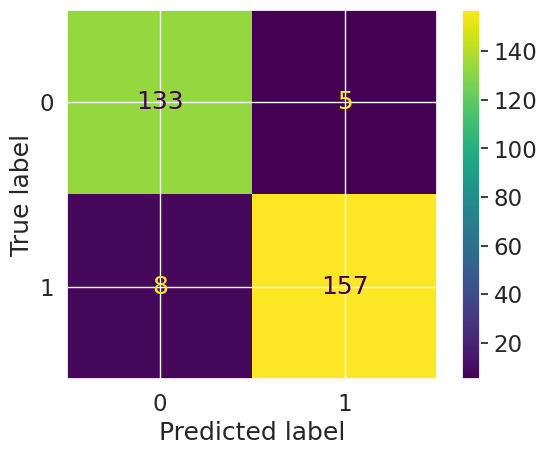

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

**Classification Report**

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [145]:
# Were precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #models predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/home/souvik150/Souvik/Personal/ML/ML and DS Course/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/souvik150/Souvik/Personal/ML/ML and DS Course/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/souvik150/Souvik/Personal/ML/ML and DS Course/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

The ones we are going to cover are:

1. R^2 (pronounced r-squared) or coeff of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [146]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model  =RandomForestRegressor(n_estimators=100)
model.fit(x_test, y_test)

RandomForestRegressor()

In [147]:
model.score(x_test, y_test)

0.9652739672763454

In [148]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [149]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [150]:
y_test.head()

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: target, dtype: float64

In [151]:
from sklearn.metrics import r2_score

# Fill an array with y_test 
y_test_mean = np.full(len(y_test), y_test.mean())

In [152]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [154]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [155]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your model predictions are.

In [157]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.1429742775193802

In [158]:
df = pd.DataFrame(data={"actual values": y_test, 
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.496090,0.019090
3024,0.45800,0.597920,0.139920
15663,5.00001,4.670657,-0.329353
20484,2.18600,2.280800,0.094800
9814,2.78000,2.635240,-0.144760
13311,1.58700,1.664170,0.077170
7113,1.98200,2.088630,0.106630
7668,1.57500,1.587970,0.012970
18246,3.40000,2.937330,-0.462670
5723,4.46600,4.624403,0.158403


In [159]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [161]:
# Mean absolute error

np.abs(df["differences"]).mean()

0.1429742775193802

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [168]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.04550530505976422

### Finally using the ` scoring ` parameter

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [171]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [172]:
np.mean(cv_acc)

0.8248087431693989

In [173]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

np.mean(cv_acc)

0.8248087431693989

In [174]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_acc

np.mean(cv_acc)

0.8329547346025924

In [175]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_acc

np.mean(cv_acc)

0.8545454545454545

In [176]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_acc

np.mean(cv_acc)

0.8426854603423346

**Let's see the ` scoring ` parameter being used for a regression problem**

In [177]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [178]:
np.random.seed(42)

In [180]:
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6535503985623042

In [181]:
# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.461228671470042

In [182]:
# Mean squared absolute error
cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4843843314777132

## 4.3 Using diff evaluation metrics as Scikit-Learn Functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics

In [187]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

# Split into X & y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [188]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [189]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)


Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [193]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [197]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

print("Regression metrics on test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective
* Could we collect more data?
* Could we improve our data?

From a model perspective 
* Is there a better model we can use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to improve the ability to find patterns

In [198]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [200]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}